In [1]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets import load_breast_cancer

from problems.rastrigin import Rastrigin
from problems.GKLS import GKLS
from iOpt.solver import Solver
from iOpt.solver_parametrs import SolverParameters
from iOpt.method.listener import StaticNDPaintListener, ConsoleFullOutputListener
from examples.Machine_learning.SVC._2D.Problems import SVC_2d


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Использование фреймворка iOpt для минимизации функции Растригина.


------------------------------------------------------------------------
|                           Task Discription                           |
------------------------------------------------------------------------
|                  dimension:  2                                       |
|                     bounds:  [[-2.2, 1.8], [-2.2, 1.8]]              |
|   objective-function count:  1                                       |
|  constraint-function count:  0                                       |
------------------------------------------------------------------------
|                          Method Parameters                           |
------------------------------------------------------------------------
|                        eps:  0.01                                    |
|                          r:  2.5                                     |
|                       eps_r:  0.001                                   |
|                 iters_limit:  300              

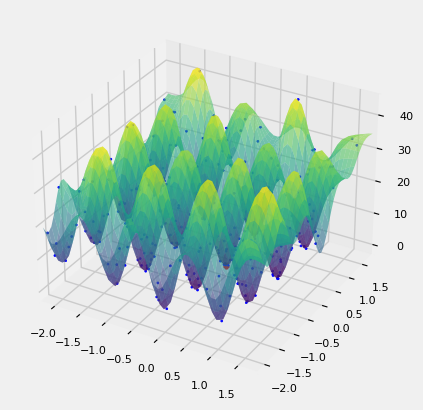

In [2]:
#Создание тестовой задачи
problem = Rastrigin(2)
#Параметры решателя
params = SolverParameters(r=2.5, eps=0.01, iters_limit=300, refine_solution=True)
#Создание решателя
solver = Solver(problem, parameters=params)
#Вывод результатов в консоль в процессе решения
cfol = ConsoleFullOutputListener(mode='result')
solver.AddListener(cfol)
#3D визуализация по окончании решения
spl = StaticNDPaintListener("rastrigin.png", "output", varsIndxs=[0,1], mode="surface", calc="interpolation")
solver.AddListener(spl)
#Запуск решения задачи
sol = solver.Solve()

Минимизация тестовой функции из GKLS генератора с номером 39.
GKLS-генератор, позволяет порождать задачи многоэкстремальной оптимизации с заранее известными свойствами: 
количеством локальных минимумов, размерами их областей притяжения, точкой глобального минимума, значением функции в ней и т.п. 


------------------------------------------------------------------------
|                           Task Discription                           |
------------------------------------------------------------------------
|                  dimension:  2                                       |
|                     bounds:  [[-1, 1], [-1, 1]]                      |
|   objective-function count:  1                                       |
|  constraint-function count:  0                                       |
------------------------------------------------------------------------
|                          Method Parameters                           |
------------------------------------------------------------------------
|                        eps:  0.01                                    |
|                          r:  3.5                                     |
|                       eps_r:  0.001                                   |
|                 iters_limit:  300              

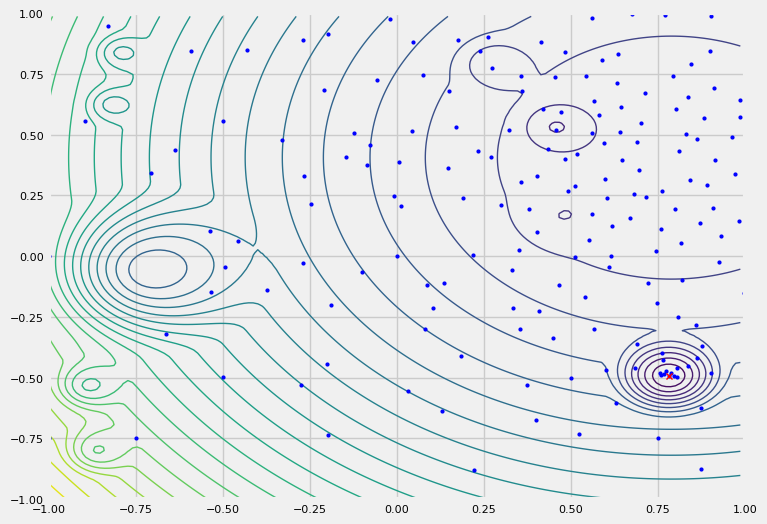

In [3]:
    # создание объекта задачи
    problem = GKLS(2, 39)

    # Формируем параметры решателя
    params = SolverParameters(r=3.5, eps=0.01, iters_limit=300, refine_solution=True)

    # Создаем решатель
    solver = Solver(problem, parameters=params)

    # Добавляем вывод резултатов в консоль
    cfol = ConsoleFullOutputListener(mode='full')
    solver.AddListener(cfol)

    # Добавляем построение 3D визуализации после решения задачи
    spl = StaticNDPaintListener("GKLS.png", "output", varsIndxs=[0, 1], mode="lines layers", calc="objective function")
    solver.AddListener(spl)

    # Решение задачи
    sol = solver.Solve()


Продемонстрируем использование фреймворка iOpt при настройке гиперпараметров одного из методов машинного обучения. В методе опорных векторов  ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)) найдем оптимальные вещественные гиперпараметры (**C** - параметр регуляризации, **gamma** - коэффициент ядра) в задаче классификации рака молочной железы ([подробное описание данных](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))). 

In [4]:
def load_breast_cancer_data():
    dataset = load_breast_cancer()
    x_raw, y_raw = dataset['data'], dataset['target']
    inputs, outputs = shuffle(x_raw, y_raw ^ 1, random_state=42)
    return inputs, outputs


------------------------------------------------------------------------
|                           Task Discription                           |
------------------------------------------------------------------------
|                  dimension:  2                                       |
|                     bounds:  [[1.0, 6.0], [-7.0, -3.0]]              |
|   objective-function count:  1                                       |
|  constraint-function count:  0                                       |
------------------------------------------------------------------------
|                          Method Parameters                           |
------------------------------------------------------------------------
|                        eps:  0.01                                    |
|                          r:  3.0                                     |
|                       eps_r:  0.001                                   |
|                 iters_limit:  100              

|    93:         -0.92071478   [ 4.39111328 -5.27929688]               |
|    94:         -0.92257496   [ 1.30517578 -4.25976562]               |
|    95:         -0.92914937   [ 3.83447266 -6.99414062]               |
|    96:         -0.90391137   [ 5.12841797 -5.19335938]               |
|    97:         -0.93753904   [ 3.77587891 -6.50976562]               |
|    98:         -0.93540241   [ 5.06494141 -6.52539062]               |
|    99:         -0.92346739   [ 4.99169922 -5.79492188]               |
|   100:         -0.91907549   [ 3.21435547 -6.70117188]               |


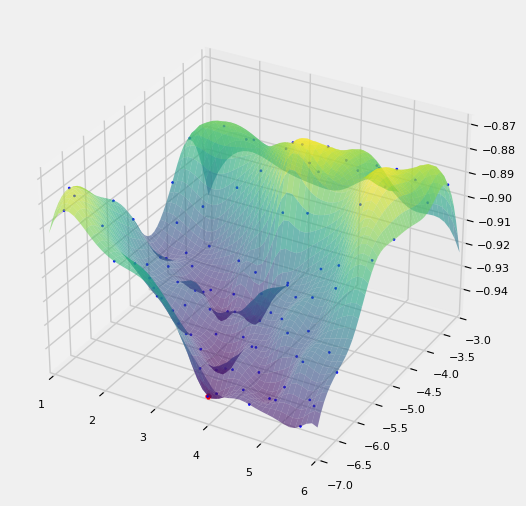

------------------------------------------------------------------------
|                                Result                                |
------------------------------------------------------------------------
|     global iteration count:  100                                     |
|      local iteration count:  0                                       |
|               solving time:  0.0                                     |
|             solution point:  [ 3.80029297 -6.76757812]               |
|             solution value:  -0.94459615                             |
|                   accuracy:  0.06250000                              |
------------------------------------------------------------------------


In [5]:
x, y = load_breast_cancer_data()
regularization_value_bound = {'low': 1, 'up': 6}
kernel_coefficient_bound = {'low': -7, 'up': -3}

problem = SVC_2d.SVC_2D(x, y, regularization_value_bound, kernel_coefficient_bound)

method_params = SolverParameters(r=np.double(3.0), iters_limit=100)
solver = Solver(problem, parameters=method_params)

spl = StaticNDPaintListener("svc2d_stat.png", "output", varsIndxs=[0, 1], mode="surface", calc="interpolation")
solver.AddListener(spl)

cfol = ConsoleFullOutputListener(mode='full')
solver.AddListener(cfol)

solver_info = solver.Solve()